# Bouncing ball (Jupyter version)

You can use `vip-ivp` in Jupyter Notebook, but don't forget to call `vip.new_system()` at the beginning of the notebook. 
Otherwise, solving time will get longer and longer.

## Initialisation

In [33]:
import vip_ivp as vip

vip.new_system()

# Parameters
initial_height = 1  # m
GRAVITY = -9.81
k = 0.7  # Bouncing coefficient
v_min = 0.01  # Minimum velocity need to bounce

## Creating the system

In [34]:
acceleration = vip.create_source(GRAVITY)
velocity = vip.integrate(acceleration, x0=0)
height = vip.integrate(velocity, x0=initial_height)

## Defining the bouncing event

In [35]:
bounce = vip.where(abs(velocity) > v_min, velocity.action_reset_to(-k * velocity), vip.terminate)
height.on_crossing(0, bounce, terminal=False, direction="falling")

Event(on height crossing 0 (falling), Action((Reset velocity to (-0.7) * velocity) if abs(velocity) > 0.01 else (Terminate simulation)), terminal = False)

## Solving

Solving time = 0.20964288711547852 s
Number of triggered events = 19



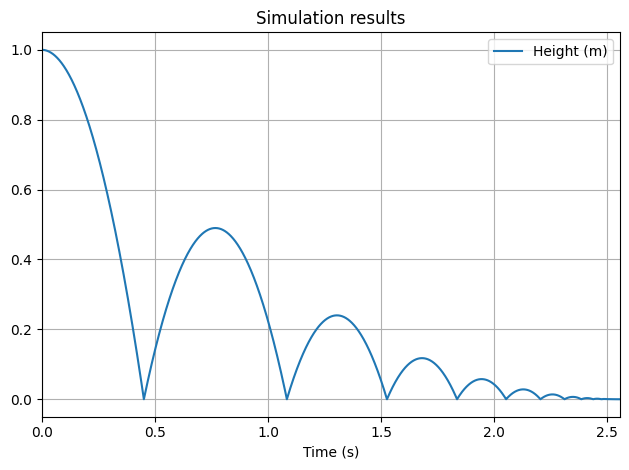

In [36]:
# Add variables to plot
height.to_plot("Height (m)")

# Solve the system
vip.solve(20, time_step=0.001, verbose=True)